In [47]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [2]:
# 데이터 불러오기
df = pd.read_excel('2019_data_preprocess.xlsx')
df.head()

,자치구,십만명당_범죄발생건수,면적당_경찰관서_수,면적당_소방관서_수,면적당_카페_수,면적당_편의점_수,면적당_공원_수,면적당_버스정류장_수,면적당_가로등_수,면적당_ATM_수,인구당_반려동물수,행복지수
0,강남구,1327.495552,0.582278,0.177215,87.468354,20.329114,3.924051,13.898734,349.063291,19.924051,0.235,0.701
1,강동구,911.464838,0.691338,0.244002,42.740952,14.802765,5.042700,15.860106,304.066694,13.460756,0.203,0.640
2,강북구,1208.076929,0.635593,0.211864,28.855932,11.271186,3.474576,19.110169,183.855932,11.525424,0.188,0.711
3,강서구,823.035638,0.313707,0.168919,33.759653,12.500000,4.102317,14.575290,215.226834,12.982625,0.198,0.672
4,관악구,1029.895580,0.676361,0.169090,37.368955,14.541765,3.719986,16.300304,179.370984,13.933040,0.171,0.714


## R^2, p-value

In [67]:
## 결정계수(R^2)와 유의확률(p-value)을 활용한 다중공선성 확인

# 데이터 불러오기
df = pd.read_excel('data_preprocess(20220227_202609)_edit.xlsx')
df1 = df.copy()

# 문자로 된 column 제거
df1 = df1.drop('자치구', axis = 1)
df1.columns

# ols에 사용할 변수 생성
x_data_full = df1[['면적당_경찰관서_수', '면적당_소방관서_수', '면적당_카페_수', '면적당_편의점_수',
       '면적당_공원_수', '면적당_버스정류장_수', '면적당_가로등_수', '면적당_ATM_수', '인구당_반려동물수',
       '행복지수']] # 변수 여러개(다중 선형회귀분석)
x_data4 = df1[['면적당_카페_수', '면적당_편의점_수', '면적당_공원_수', '면적당_ATM_수']]
target = df1[['십만명당_범죄발생건수']]

# 상수항 추가
x_data_full_ = sm.add_constant(x_data_full, has_constant = "add")
x_data4_ = sm.add_constant(x_data4, has_constant = "add")

# ols 적용 후 fit() 메서드로 학습
result_pvalue = sm.OLS(target, x_data_full_).fit()
result_predict1 = sm.OLS(target, x_data4_).fit()

# 결과 print
print('회귀계수(parameter) : ', result_predict1.params)
print('유의확률(p-value) : ', result_predict1.pvalues)
print('결정계수(R-requared) : ', result_predict1.rsquared)
print('각 독립변수의 범죄발생건수 예측 : ', result_predict1.predict())
result_predict1.summary() # 최종결과

회귀계수(parameter) :  const        1380.750993
면적당_카페_수       17.382621
면적당_편의점_수    -204.950117
면적당_공원_수     -164.824246
면적당_ATM_수     179.274682
dtype: float64
유의확률(p-value) :  const        0.000024
면적당_카페_수     0.000001
면적당_편의점_수    0.000019
면적당_공원_수     0.005930
면적당_ATM_수    0.000005
dtype: float64
결정계수(R-requared) :  0.8489947611811449
각 독립변수의 범죄발생건수 예측 :  [1659.82517644  671.88584411 1065.83402565 1057.00061155  934.68229382
  974.87427698  915.29463841 1412.37124848  737.09101008  801.63117097
  966.98077319  684.03650636 1393.65930388  988.64917881 1214.8548302
 1058.11694352  931.27414739 1107.81703653  732.76579347 1162.07091195
 1319.14522502 1052.5183708  1942.44872501 3102.84767938  685.47691059]


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            십만명당_범죄발생건수   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     28.11
Date:                Mon, 28 Feb 2022   Prob (F-statistic):           5.85e-08
Time:                        08:00:22   Log-Likelihood:                -169.28
No. Observations:                  25   AIC:                             348.6
Df Residuals:                      20   BIC:                             354.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1380.7510    252.515      5.468      0.000     854.014    1907.488
면적당_카페_수      17.3826      2.555      6.805      0.000      12.054      22.711
면적당_편의점_수   -204.9501     36.833     -5.564      0.000    -281.782    -128.118
면적당_공원_수    -164.8242     53.544     -3.078      0.006    -276.516     -53.133
면적당_ATM_수    179.2747     29.241      6.131      0.000     118.279     240.271
==============================================================================
Omnibus:                        1.172   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.557   Jarque-Bera (JB):                0.923
Skew:                           0.189   Prob(JB):                        0.630
Kurtosis:                       2.138   Cond. No.                         370.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
## 결정계수(R^2)와 유의확률(p-value)을 활용한 다중공선성 확인
## 값이 튀는 중구, 종로구 제거

# 데이터 불러오기
df2 = df.copy()

# 중구, 종로구 제거
df2 = df2.drop(index =[22, 23])
df2.columns

# ols에 사용할 변수 생성
x_data_full_2 = df2[['면적당_경찰관서_수', '면적당_소방관서_수', '면적당_카페_수', '면적당_편의점_수',
       '면적당_공원_수', '면적당_버스정류장_수', '면적당_가로등_수', '면적당_ATM_수', '인구당_반려동물수',
       '행복지수']] # 변수 여러개(다중 선형회귀분석)
x_data4_2 = df2[['면적당_카페_수', '면적당_편의점_수', '면적당_공원_수', '면적당_ATM_수']]
target_2 = df2[['십만명당_범죄발생건수']]

# 상수항 추가
x_data_full_2_ = sm.add_constant(x_data_full_2, has_constant = "add")
x_data4_2_ = sm.add_constant(x_data4_2, has_constant = "add")

# ols 적용 후 fit() 메서드로 학습
result_pvalue2 = sm.OLS(target_2, x_data_full_2_).fit()
result_predict2 = sm.OLS(target_2, x_data4_2_).fit()

# 결과 print
print('절편과 기울기 : ', result_pvalue.params)
print('유의확률 : ', result_pvalue.pvalues)
print('결정계수 : ', result_pvalue.rsquared)
print('각 독립변수의 범죄발생건수 예측 : ', result_pvalue.predict())
result_pvalue.summary()

절편과 기울기 :  const          2029.561270
면적당_경찰관서_수     -109.084024
면적당_소방관서_수     1057.955350
면적당_카페_수          9.679321
면적당_편의점_수      -111.998080
면적당_공원_수       -166.603224
면적당_버스정류장_수      -2.763368
면적당_가로등_수         0.090116
면적당_ATM_수       105.303731
인구당_반려동물수      2202.864874
행복지수          -1728.976742
dtype: float64
유의확률 :  const          0.217711
면적당_경찰관서_수     0.750530
면적당_소방관서_수     0.425110
면적당_카페_수       0.042850
면적당_편의점_수      0.126464
면적당_공원_수       0.064997
면적당_버스정류장_수    0.845884
면적당_가로등_수      0.942490
면적당_ATM_수      0.112668
인구당_반려동물수      0.443380
행복지수           0.399586
dtype: float64
결정계수 :  0.606432249984246
각 독립변수의 범죄발생건수 예측 :  [1466.3692306   869.66055171  984.71652227 1037.91726421  828.48777641
 1095.47337614 1039.52337711 1161.87628074  689.85899075  908.15653862
 1036.61527603  917.50854437 1156.59507869  866.55162923 1130.25087965
 1018.55798868  814.66734385 1006.56494052  701.77615149 1279.79578153
 1259.46007566  933.13213018  823.39942787]


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            십만명당_범죄발생건수   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     1.849
Date:                Mon, 28 Feb 2022   Prob (F-statistic):              0.156
Time:                        07:49:12   Log-Likelihood:                -147.62
No. Observations:                  23   AIC:                             317.2
Df Residuals:                      12   BIC:                             329.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2029.5613   1560.093      1.301      0.218   -1369.589    5428.711
면적당_경찰관서_수   -109.0840    335.297     -0.325      0.751    -839.634     621.466
면적당_소방관서_수   1057.9554   1281.350      0.826      0.425   -1733.867    3849.778
면적당_카페_수        9.6793      4.274      2.265      0.043       0.367      18.992
면적당_편의점_수    -111.9981     68.198     -1.642      0.126    -260.588      36.592
면적당_공원_수     -166.6032     82.024     -2.031      0.065    -345.319      12.112
면적당_버스정류장_수    -2.7634     13.913     -0.199      0.846     -33.076      27.550
면적당_가로등_수       0.0901      1.223      0.074      0.942      -2.575       2.756
면적당_ATM_수     105.3037     61.523      1.712      0.113     -28.744     239.351
인구당_반려동물수    2202.8649   2779.173      0.793      0.443   -3852.433    8258.163
행복지수        -1728.9767   1979.595     -0.873      0.400   -6042.144    2584.190
==============================================================================
Omnibus:                        2.210   Durbin-Watson:                   2.177
Prob(Omnibus):                  0.331   Jarque-Bera (JB):                1.195
Skew:                          -0.180   Prob(JB):                        0.550
Kurtosis:                       1.943   Cond. No.                     2.40e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.4e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [5]:
# 실제값과 predict 예측값 차이
# '모든 구 포함 예측값'과 '중구, 종로구 제거 후 예측값' 비교

df1['각_독립변수의_십만명당_범죄발생건수_예측결과'] = result_predict1.predict()
df1['실제값_예측값_차이값'] = abs(df1['십만명당_범죄발생건수'] - df1['각_독립변수의_십만명당_범죄발생건수_예측결과'])
print('실제값 - 예측값 : ', df1['실제값_예측값_차이값'].sum())

df2['각_독립변수의_십만명당_범죄발생건수_예측결과'] = result_predict2.predict()
df2['실제값_예측값_차이값'] = abs(df2['십만명당_범죄발생건수'] - df2['각_독립변수의_십만명당_범죄발생건수_예측결과'])
print('실제값 - 예측값 (중구, 종로구 제거) : ', df2['실제값_예측값_차이값'].sum())

실제값 - 예측값 :  4483.7272421605585
실제값 - 예측값 (중구, 종로구 제거) :  3125.067160723829


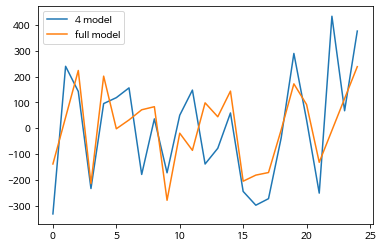

In [64]:
# 4개 모델과 full모델의 잔차비교

import matplotlib.pyplot as plt
result_predict1.resid.plot(label = "4 model")
result_pvalue.resid.plot(label = "full model")
plt.legend()

## 상관계수, 산점도

In [10]:
df_data = df[['면적당_경찰관서_수', '면적당_소방관서_수', '면적당_카페_수',
       '면적당_편의점_수', '면적당_공원_수', '면적당_버스정류장_수', '면적당_가로등_수', '면적당_ATM_수',
       '인구당_반려동물수', '행복지수']]

# 상관계수
df_data.corr()

,면적당_경찰관서_수,면적당_소방관서_수,면적당_카페_수,면적당_편의점_수,면적당_공원_수,면적당_버스정류장_수,면적당_가로등_수,면적당_ATM_수,인구당_반려동물수,행복지수
면적당_경찰관서_수,1.000000,0.836106,0.578156,0.770716,0.635135,0.473407,0.819791,0.819262,-0.217076,-0.187015
면적당_소방관서_수,0.836106,1.000000,0.680990,0.750601,0.730677,0.332955,0.874307,0.788084,-0.288992,-0.344287
면적당_카페_수,0.578156,0.680990,1.000000,0.762555,0.480861,0.165341,0.733386,0.714754,0.005976,-0.041529
면적당_편의점_수,0.770716,0.750601,0.762555,1.000000,0.538280,0.428122,0.845474,0.966443,-0.020456,-0.168107
면적당_공원_수,0.635135,0.730677,0.480861,0.538280,1.000000,0.414693,0.705891,0.557960,-0.341039,-0.309225
면적당_버스정류장_수,0.473407,0.332955,0.165341,0.428122,0.414693,1.000000,0.262061,0.373626,-0.003203,-0.066547
면적당_가로등_수,0.819791,0.874307,0.733386,0.845474,0.705891,0.262061,1.000000,0.898312,-0.145132,-0.260496
면적당_ATM_수,0.819262,0.788084,0.714754,0.966443,0.557960,0.373626,0.898312,1.000000,-0.127343,-0.209614
인구당_반려동물수,-0.217076,-0.288992,0.005976,-0.020456,-0.341039,-0.003203,-0.145132,-0.127343,1.000000,0.131144
행복지수,-0.187015,-0.344287,-0.041529,-0.168107,-0.309225,-0.066547,-0.260496,-0.209614,0.131144,1.000000


In [11]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-470
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

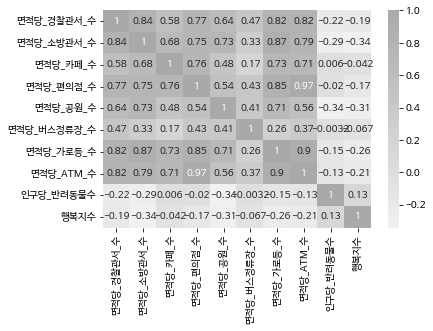

In [14]:
# 코랩 나눔고딕 font 다운로드
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False # '-' 기호 깨지는거 방지

# 상관행렬 시각화
import seaborn as sns
plt.rc('font', family='NanumBarunGothic') 
cmap = sns.light_palette("darkgray", as_cmap = True)  
sns.heatmap(df_data.corr(), annot = True, cmap = cmap)
plt.show()

In [ ]:
sns.pairplot(df_data)
plt.show()

## 시각화, MSE

In [25]:
# 데이터 불러오기
df = pd.read_excel('data_preprocess(20220227_202609)_edit.xlsx')
df.head()

,자치구,십만명당_범죄발생건수,면적당_경찰관서_수,면적당_소방관서_수,면적당_카페_수,면적당_편의점_수,면적당_공원_수,면적당_버스정류장_수,면적당_가로등_수,면적당_ATM_수,인구당_반려동물수,행복지수
0,강남구,1327.495552,0.582278,0.177215,87.468354,20.329114,3.924051,13.898734,349.063291,19.924051,0.235,0.701
1,강동구,911.464838,0.691338,0.244002,42.740952,14.802765,5.042700,15.860106,304.066694,13.460756,0.203,0.640
2,강북구,1208.076929,0.635593,0.211864,28.855932,11.271186,3.474576,19.110169,183.855932,11.525424,0.188,0.711
3,강서구,823.035638,0.313707,0.168919,33.759653,12.500000,4.102317,14.575290,215.226834,12.982625,0.198,0.672
4,관악구,1029.895580,0.676361,0.169090,37.368955,14.541765,3.719986,16.300304,179.370984,13.933040,0.171,0.714


In [27]:
# 원본파일 보존
df1 = df.copy()

# 문자로 된 column 제거
df1 = df1.drop('자치구', axis = 1)
df1.head()

,십만명당_범죄발생건수,면적당_경찰관서_수,면적당_소방관서_수,면적당_카페_수,면적당_편의점_수,면적당_공원_수,면적당_버스정류장_수,면적당_가로등_수,면적당_ATM_수,인구당_반려동물수,행복지수
0,1327.495552,0.582278,0.177215,87.468354,20.329114,3.924051,13.898734,349.063291,19.924051,0.235,0.701
1,911.464838,0.691338,0.244002,42.740952,14.802765,5.042700,15.860106,304.066694,13.460756,0.203,0.640
2,1208.076929,0.635593,0.211864,28.855932,11.271186,3.474576,19.110169,183.855932,11.525424,0.188,0.711
3,823.035638,0.313707,0.168919,33.759653,12.500000,4.102317,14.575290,215.226834,12.982625,0.198,0.672
4,1029.895580,0.676361,0.169090,37.368955,14.541765,3.719986,16.300304,179.370984,13.933040,0.171,0.714


In [ ]:
df1.columns

In [78]:
# 학습 검증데이터 분할
from sklearn.model_selection import train_test_split

X = x_data_full_
y = target

train_x, test_x, train_y, test_y = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 2)
# 학습데이터와 검증데이터를 7:3으로 분리
# random_state고정을 통해 그때마다 똑같은 값을 분류하도록 한다.

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(17, 11) (8, 11) (17, 1) (8, 1)


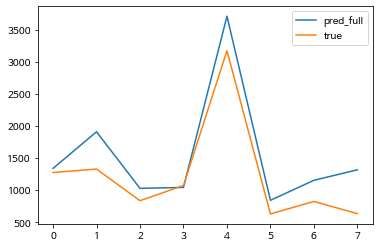

In [82]:
# train_x에 상수항 추가 후 회귀모델 적합
fit_train1 = sm.OLS(train_y, train_x).fit()

# 검증데이터에 대한 예측값과 실제값 비교
plt.plot(np.array(fit_train1.predict(test_x)),label = "pred_full")
plt.plot(np.array(test_y),label = "true")
plt.legend()
plt.show()

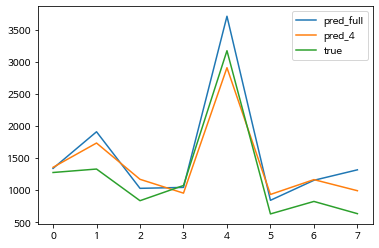

In [81]:
# fit_train1(모든 변수 포함) 데이터와 fit_train2(4개 변수만 포함) 데이터 비교하기
X = x_data4_
y = target

train_x2,test_x2,train_y2,test_y2 = train_test_split(X,y,train_size=0.7, test_size=0.3, random_state = 2)

# train_x2에 상수항 추가 후 회귀모델 적합
fit_train2 = sm.OLS(train_y2, train_x2).fit()

# 검증데이터에 대한 예측값과 실제값 비교
plt.plot(np.array(fit_train1.predict(test_x)),label = "pred_full")
plt.plot(np.array(fit_train2.predict(test_x2)),label = "pred_4")
plt.plot(np.array(test_y),label = "true")
plt.legend()
plt.show()

In [84]:
from sklearn.metrics import mean_squared_error

# 변수 제거가 이루어지지 않은 full모델
mse1 = mean_squared_error(y_true = test_y["십만명당_범죄발생건수"], y_pred = fit_train1.predict(test_x))

# 4개 변수만 포함한 모델
mse2 = mean_squared_error(y_true = test_y2["십만명당_범죄발생건수"], y_pred = fit_train2.predict(test_x2))

print(mse1)
print(mse2)

160796.47563628593
87575.5231242995
